In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from BacktestReturns import Backtest

# Implied Signal Returns

In [2]:
def prep_implied_signal() -> pd.DataFrame: 

    df_imp = (Backtest().implied_signal_rtn().drop(
        columns = ["lower_decile", "upper_decile"]).
        assign(
            pca_group = lambda x: x.variable.str.split(" ").str[0],
            pca_level = lambda x: x.variable.str.split(" ").str[1]).
        drop(columns = ["variable"]))
    
    return df_imp

df_imp = prep_implied_signal()

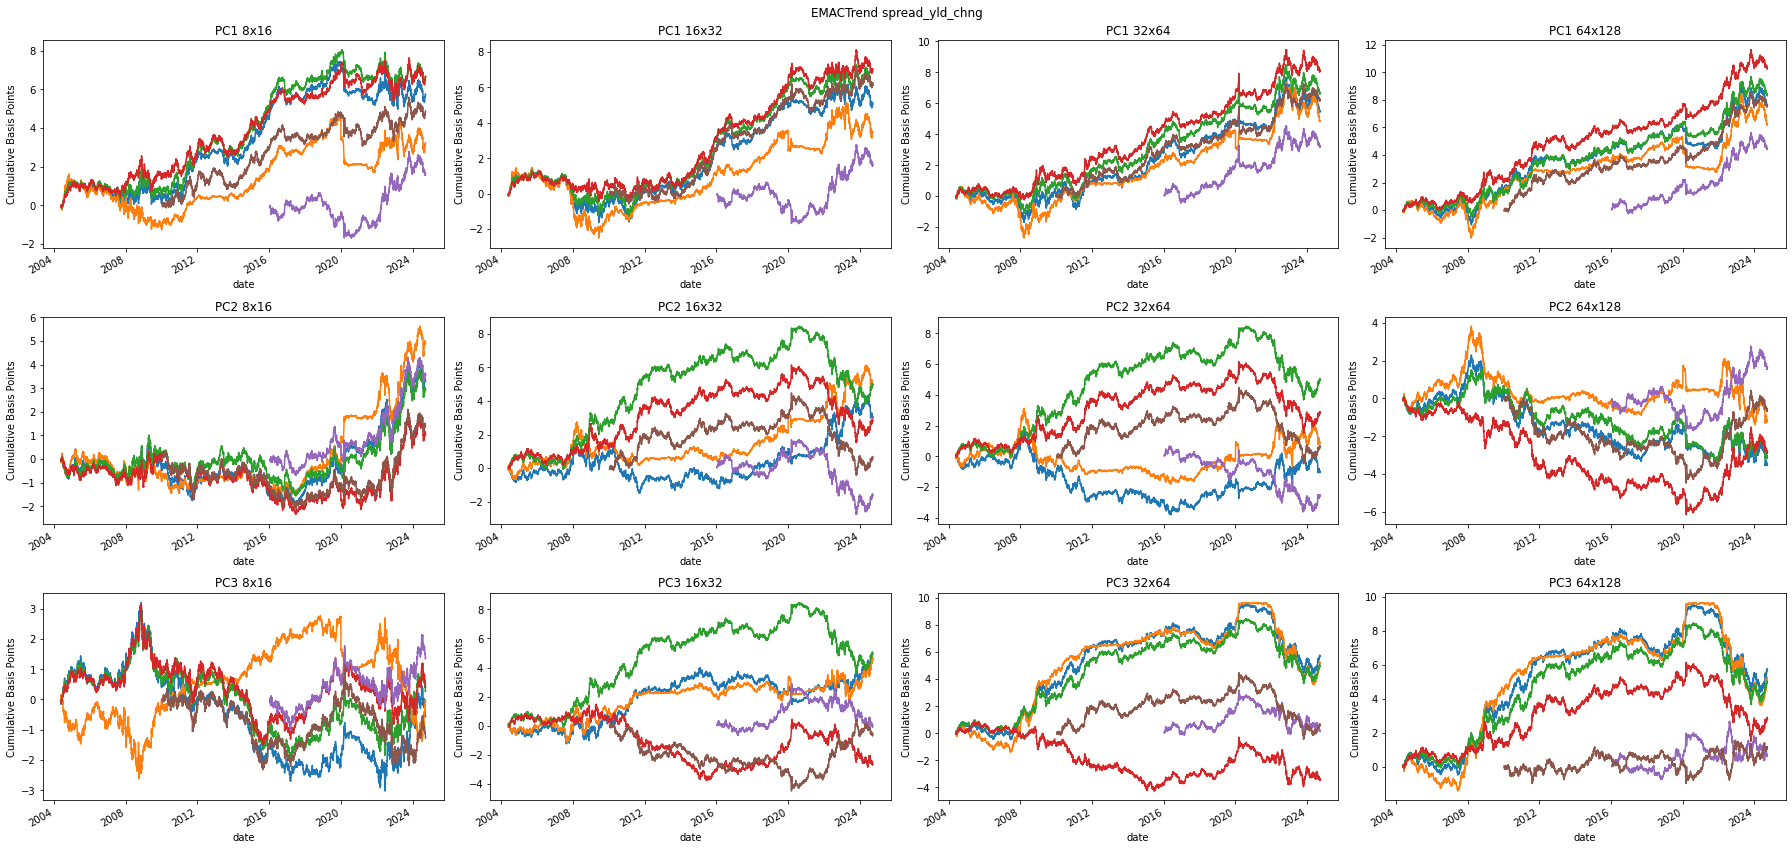

In [30]:
def plot_cum_strats(df_imp: pd.DataFrame, signal_type: str = "EMACTrend", pca_group:   str = "spread_yld_chng") -> plt.Figure: 

    df_plot = (df_imp.query(
        "signal_type == @signal_type & pca_group == @pca_group")
        [["date", "strat_name", "security", "pca_level", "signal_rtn"]].
        assign(group_var = lambda x: x.pca_level + "_" + x.strat_name))

    strats     = df_plot.strat_name.drop_duplicates().to_list()
    pcs        = df_plot.pca_level.drop_duplicates()
    group_vars = df_plot.group_var.drop_duplicates().to_list()

    fig, axes = plt.subplots(ncols = len(strats), nrows = len(pcs), figsize = (25, 12))

    for group_var, ax in zip(group_vars, axes.flatten()): 

        (df_plot.query(
            "group_var == @group_var")
            [["date", "security", "signal_rtn"]].
            rename(columns = {"security": ""}).
            pivot(index = "date", columns = "", values = "signal_rtn").
            cumsum().
            plot(
                ax     = ax,
                legend = False,
                title  = group_var.replace("_", " "),
                ylabel = "Cumulative Basis Points"))

    fig.suptitle("{} {}".format(signal_type, pca_group))
    plt.tight_layout()
    
plot_cum_strats(df_imp)

In [24]:
df_imp.pca_group.drop_duplicates()

0                      fut
314484          spread_yld
628884     spread_yld_chng
943284                 yld
1257732           yld_diff
Name: pca_group, dtype: object

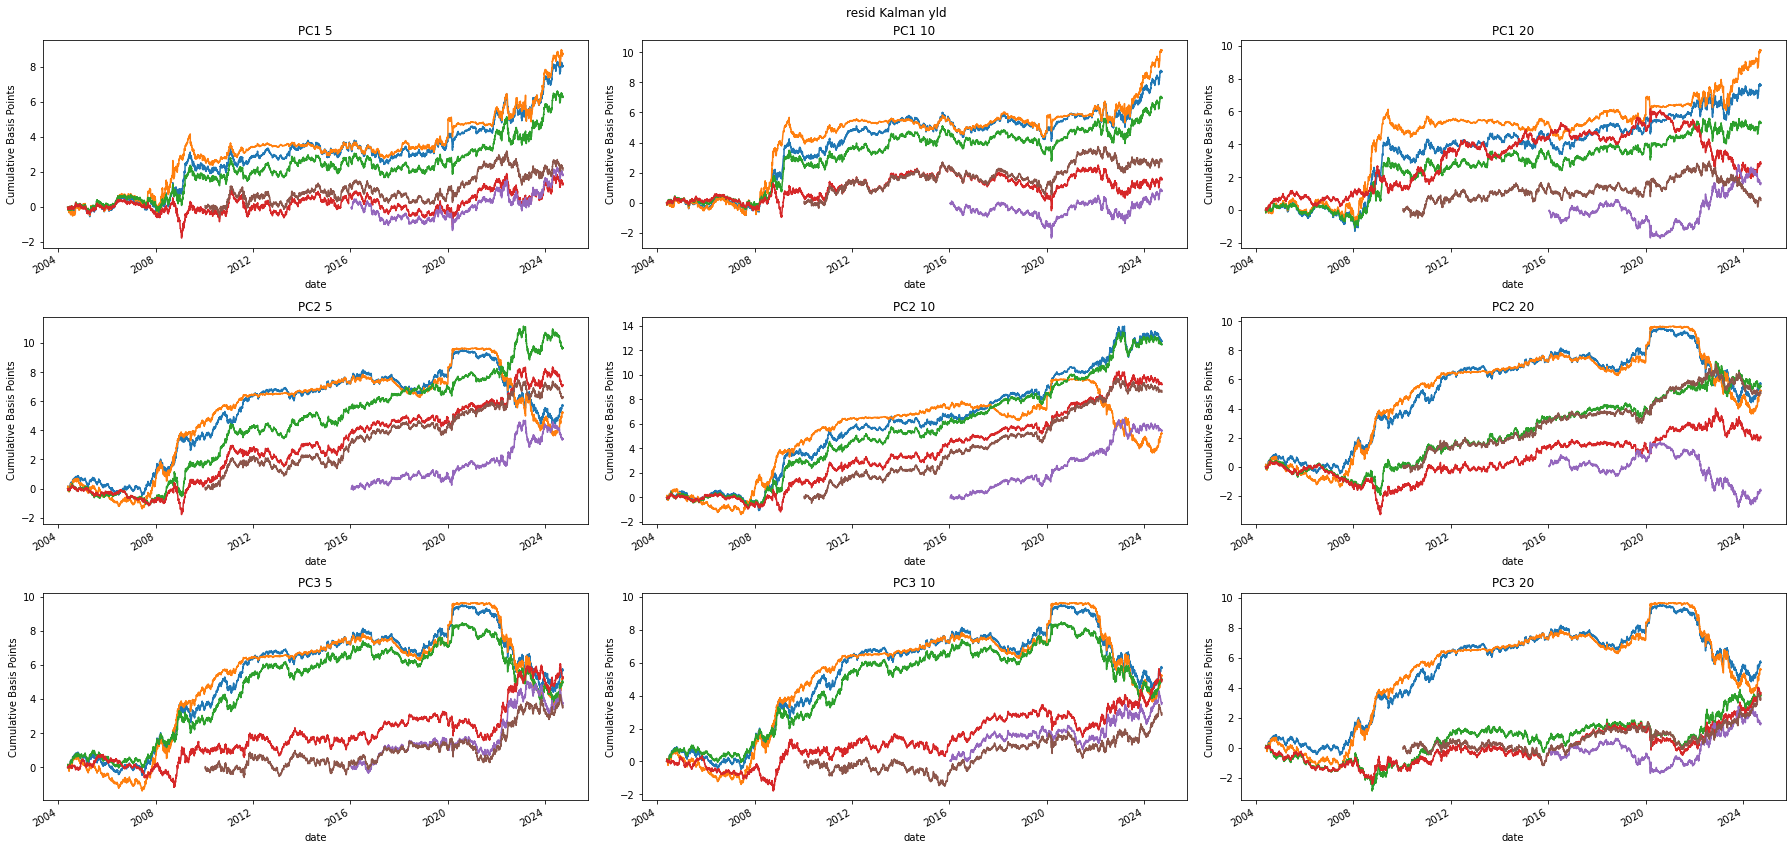

In [36]:
plot_cum_strats(df_imp, signal_type = "resid Kalman", pca_group = "yld")

In [37]:
path = r"C:\Users\Diego\Desktop\app_prod\research\TrendFollowingPCs\data\SignalRtn\SignalReturns.parquet"

In [41]:
df_tmp = (pd.read_parquet(
    path = path, engine = "pyarrow").
    query("signal_type == 'resid Kalman'").
    assign(
        pca_group = lambda x: x.variable.str.split(" ").str[0],
        pca_level = lambda x: x.variable.str.split(" ").str[1]))

In [44]:
df_tmp.pca_group.drop_duplicates().sort_values().to_list()

['fut', 'spread_yld', 'spread_yld_chng', 'yld', 'yld_diff']

In [48]:
pca_group = "fut"

df_plot = (df_tmp.assign(
    group_var = lambda x: x.pca_level + " " + x.strat_name).
    query("pca_group == @pca_group"))

pcs        = df_plot.pca_level.drop_duplicates().to_list()
params     = df_plot.strat_name.drop_duplicates().to_list()
group_vars = df_plot.group_var.drop_duplicates().to_list()

#fig, axes = plt.subplots(ncols = len(pcs), nrows = len(params), figsize = (20,12))
for group_var in group_vars:
    
    display(df_plot.query(
        "group_var == @group_var")
        [["group_var", "date", "signa"]])
    
    break

,date,variable,strat_name,lag_signal,signal_type,security,PX_bps,pca_group,pca_level,group_var
2352,2004-05-28,fut PC1,5,-0.640745,resid Kalman,FV1,-0.065183,fut,PC1,PC1 5
2353,2004-05-28,fut PC1,5,-0.640745,resid Kalman,TU1,-0.092604,fut,PC1,PC1 5
2354,2004-05-28,fut PC1,5,-0.640745,resid Kalman,TY1,-0.058619,fut,PC1,PC1 5
2355,2004-05-28,fut PC1,5,-0.640745,resid Kalman,US1,-0.034049,fut,PC1,PC1 5
3192,2004-06-01,fut PC1,5,1.154109,resid Kalman,FV1,-0.026113,fut,PC1,PC1 5
...,...,...,...,...,...,...,...,...,...,...
5501107,2024-09-20,fut PC1,5,0.440518,resid Kalman,TU1,0.027773,fut,PC1,PC1 5
5501108,2024-09-20,fut PC1,5,0.440518,resid Kalman,TY1,0.016810,fut,PC1,PC1 5
5501109,2024-09-20,fut PC1,5,0.440518,resid Kalman,US1,0.009060,fut,PC1,PC1 5
5501110,2024-09-20,fut PC1,5,0.440518,resid Kalman,UXY1,0.010232,fut,PC1,PC1 5
